# Basic reading and visualization of radar data with Py-ART

## Introduction to Jupyter

What you are looking at is an [Jupyter Notebook](http://jupyter.org/), a web-based interactive computation enviroment well suited for creating and sharing examples of scientific Python computations.

<img class="logo" src="images/jupyter-logo.svg" height=100 />

One of the key features of Jupyter notebooks is that Python code can be written and executed in cells. 

Click on the next cell and press shift+enter to execute the Python code.


In [1]:
# This is a Python comment
# the next line is a line of Python code
print "Hello World!"

Hello World!


---
Cells can also be used to create textual materials using the markup language [Markdown](http://en.wikipedia.org/wiki/Markdown).  

Double click on this cell (or any others) to see the raw markdown which produces the nicely formatted text.

---
One of the reasons these Notebooks are so well suited for scientific Python work is that Juypter is well integrated into the [Scientific Python ecosystem](http://www.scipy.org/).  For example, plots can be included in notebooks for visualizing data.  Execute the next two cells (using ctrl+enter)

In [2]:
# These two lines turn on inline plotting 
%matplotlib inline
import matplotlib.pyplot as plt

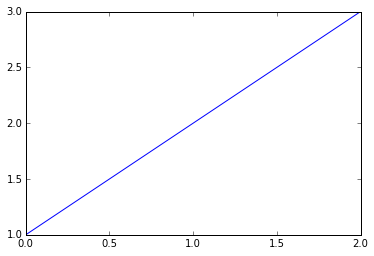

In [3]:
plt.plot([1,2,3])

---
We will be using Jupyter notebooks for all the course materials so that you can interactively run Py-ART examples and play with data

Jupyter has a number of additional features and uses which are outside the scope of this introduction.  To learn more, see the Jupyter [documentation](http://jupyter.readthedocs.org/en/latest/), look at some [examples](http://nbviewer.ipython.org/github/ipython/ipython/blob/2.x/examples/Notebook/Index.ipynb), or checkout the [gallery](https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks) of interesting notebooks.

---
## What is Py-ART?

The Python ARM Radar Toolkit or Py-ART:

* Py-ART is a Python module for plotting, correcting and analyzing weather radar data.
* Developement began to address the needs of ARM with the acquisition of a number of new scanning cloud and precipitation radar as part of the American Recovery Act.
* The project has since expanded to work with a variery of weather radars and a wider user base including radar researchers and climate modelers.
* The software has been [released on GitHub](https://github.com/ARM-DOE/pyart) as open source software under a BSD license.
* Runs on Linux, OS X and Windows.
* Contributions from others are always welcome.

---
## What can Py-ART do?

Py-ART can be used for a variety of tasks  from basic plotting to more complex processing pipelines.  Specific uses for Py-ART include:

* Reading radar data in a variety of file formats.
* Creating plots and visualization of radar data.
* Correcting radar moments while in antenna coordinates.
    * Doppler unfolding/de-aliasing.
    * Attenuation correction.
    * Phase processing using a Linear Programming method.
* Mapping data from one or multiple radars onto a Cartesian grid.
* Performing retrivals on this mapped data or on the original radial data.
* Writing radial and Cartesian data to NetCDF files.

We will be covering some of these topics in the course.

---
## What Py-ART is not.

* Py-ART is **NOT** a real-time operations radar system.  Other software does a much better job at this.
* Py-ART is not designed to be fast or memory efficient.
    * Although some of our routines have been heavily optimized.
* Py-ART does not have all the latest and greatest correction and retrival algorithms.
    * But we would be happy to help you add your favorite.
* Py-ART is not the only open source radar software out there.
    * [wradlib](http://wradlib.bitbucket.org/) : Open Source Library for   Weather Radar Data Processing.
    * [BALTRAD](http://baltrad.eu/) : Software running a real time  operations radar network. 
    * [RadX](http://www.ral.ucar.edu/projects/titan/docs/radial_formats/radx.html) : NCAR software for converting between radar data formats. 
    * [TRMM Radar Software Library (RSL)](http://trmm-fc.gsfc.nasa.gov/trmm_gv/software/rsl/) : Library from NASA for open-oriented access to Radar files in C. 
    * We are collaborating with a number of these packages.

---
## Py-ART essentials links

* Landing page, [arm-doe.github.io/pyart/](http://arm-doe.github.io/pyart/)
* Documentation, [arm-doe.github.io/pyart-docs-travis/](http://arm-doe.github.io/pyart-docs-travis/)
* Examples, [arm-doe.github.io/pyart/dev/auto_examples/index.html](http://arm-doe.github.io/pyart/dev/auto_examples/index.html)
* Source Code, [github.com/ARM-DOE/pyart](https://github.com/ARM-DOE/pyart)
* Mailing list, [groups.google.com/group/pyart-users/](http://groups.google.com/group/pyart-users/)
* Issue Tracker, [github.com/ARM-DOE/pyart/issues](https://github.com/ARM-DOE/pyart/issues)

---
Before we begin lets change the default size of our figures so they are easier to see.

In [4]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12.0, 9.0]

---
Enough introduction, lets look at some radar data!

First, we need to import Py-ART. This allows us to use the included routines to read in data from radar files.

_Use shift+enter to execute the cell_

In [5]:
import pyart

To begin we will be examining a file from the W-band Scanning ARM Cloud Radar ([WSACR](http://www.arm.gov/instruments/wsacr)).  This file is formatted to meet the [CfRadial](http://www.ral.ucar.edu/projects/titan/docs/radial_formats/cfradial.html) file format specification.

In [6]:
radar = pyart.io.read('data/sgpwsacrcwrhiC1.a1.20120820.204016.nc')

We have just created a [**Radar**](http://arm-doe.github.io/pyart-docs-travis/user_reference/generated/pyart.core.Radar.html#pyart.core.Radar) instance which is the class Py-ART uses to store and process radar volume data.  We will discuss this class in detail later.

---
For now use the [`info`](http://arm-doe.github.io/pyart-docs-travis/user_reference/generated/pyart.core.Radar.extract_sweeps.html#pyart.core.Radar.extract_sweeps) method to describe the data in the WSACR file we have just read. 

In [7]:
radar.info('compact')
# try out 'standard' or 'full' also

altitude: <ndarray of type: float64 and shape: (1,)>
altitude_agl: <ndarray of type: float64 and shape: (1,)>
antenna_transition: <ndarray of type: int32 and shape: (8367,)>
azimuth: <ndarray of type: float32 and shape: (8367,)>
elevation: <ndarray of type: float32 and shape: (8367,)>
fields:
	linear_depolarization_ratio: <ndarray of type: float32 and shape: (8367, 949)>
	spectral_width: <ndarray of type: float32 and shape: (8367, 949)>
	snr: <ndarray of type: float32 and shape: (8367, 949)>
	mean_doppler_velocity: <ndarray of type: float32 and shape: (8367, 949)>
	reflectivity: <ndarray of type: float32 and shape: (8367, 949)>
fixed_angle: <ndarray of type: float32 and shape: (17,)>
instrument_parameters:
	radar_measured_transmit_power_h: <ndarray of type: float32 and shape: (8367,)>
	follow_mode: <ndarray of type: |S1 and shape: (17, 4)>
	nyquist_velocity: <ndarray of type: float32 and shape: (8367,)>
	unambiguous_range: <ndarray of type: float32 and shape: (8367,)>
	radar_antenna_ga

---
From this listing we see that the file contains a volume consisting of 17 RHI scans with five fields:

* snr
* reflectivity
* mean_doppler_velocity
* spectral_width
* linear_depolarization_ratio

Let's use Py-ART's [**RadarDisplay**](http://arm-doe.github.io/pyart-docs-travis/user_reference/generated/pyart.graph.RadarDisplay.html#pyart.graph.RadarDisplay) class to plot these fields.

In [8]:
display = pyart.graph.RadarDisplay(radar)

The display variable is an instance of the **RadarDisplay** class.  We can  use the `plot` method of this class to visualize the reflectivity data from the second sweep in the WSACR radar volume.

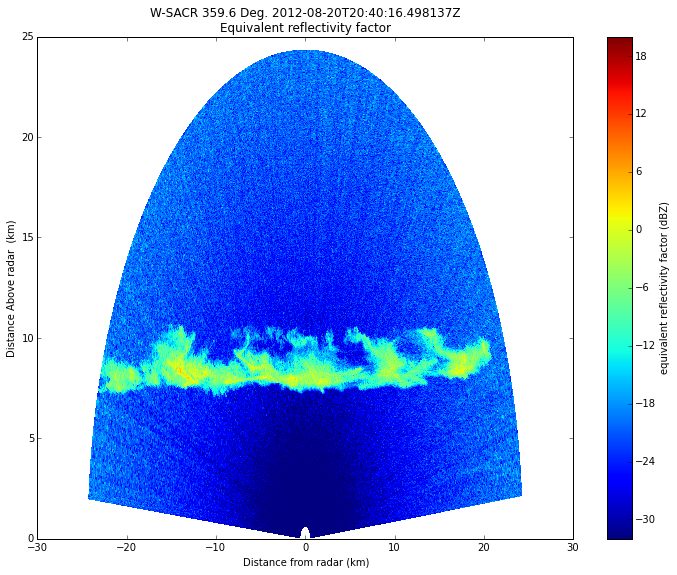

In [9]:
display.plot('reflectivity', sweep=1, vmin=-32, vmax=20)

The colormap used here is not ideal.  Py-ART comes with colormaps that are more appropiate for plotting radar data

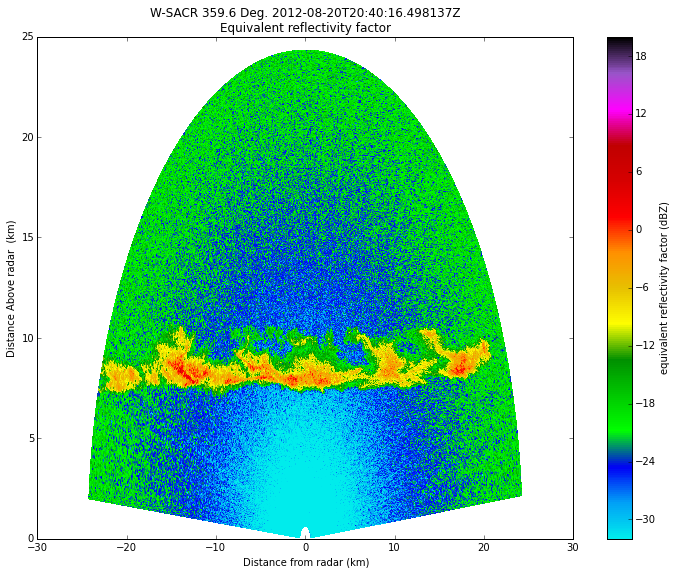

In [10]:
display.plot('reflectivity', sweep=1,
             vmin=-32, vmax=20, cmap='pyart_NWSRef')

Zooming in on an interesting region of this plot can be accomplished using the [`set_limits`](http://arm-doe.github.io/pyart-docs-travis/user_reference/generated/pyart.graph.RadarDisplay.set_limits.html#pyart.graph.RadarDisplay.set_limits) method. 

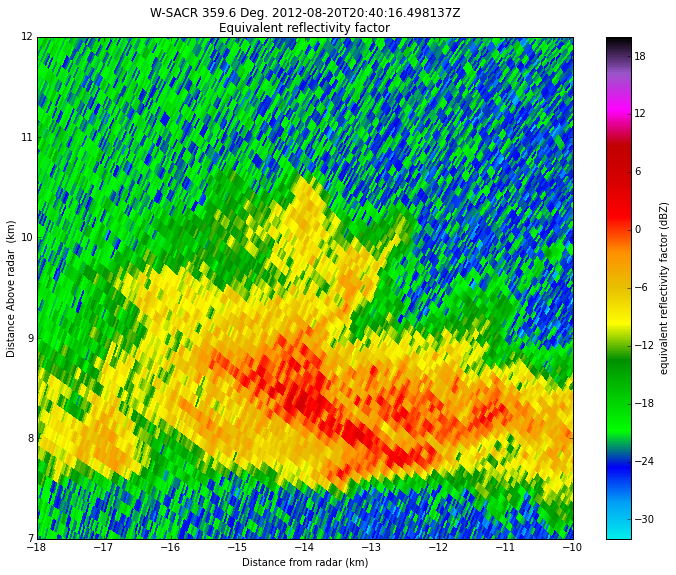

In [11]:
display.plot('reflectivity', sweep=1, 
             vmin=-32, vmax=20, cmap='pyart_NWSRef')
display.set_limits(ylim=(7, 12), xlim=(-18, -10))

---
Plotting the other radar moments is done in the same manner.  Feel free to adjust the luminosity limits by chaning vmin or vmax to your liking and try out other colormaps.

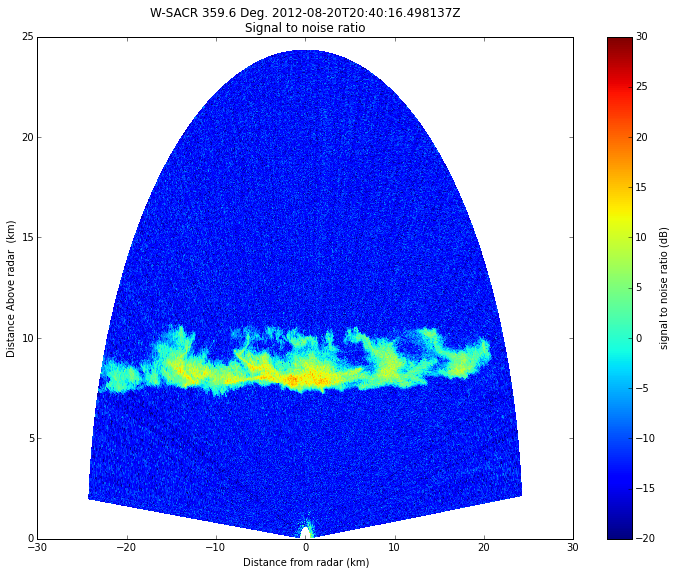

In [12]:
display.plot('snr', sweep=1, vmin=-20, vmax=30)

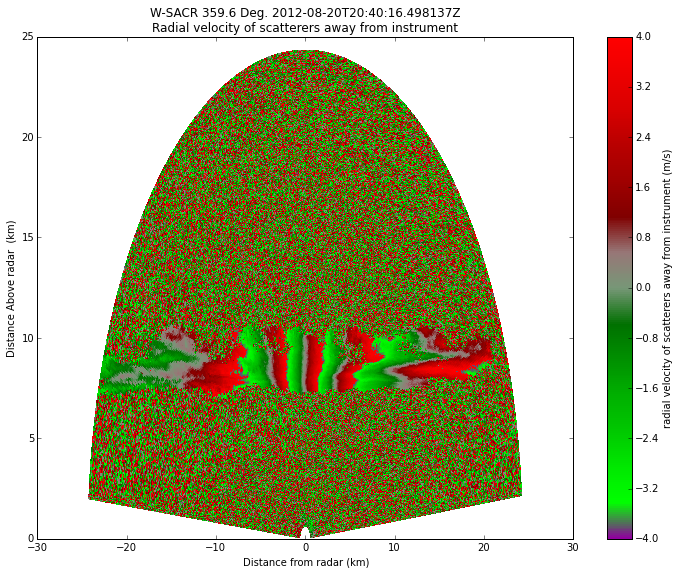

In [13]:
display.plot('mean_doppler_velocity', sweep=1, 
             vmin=-4, vmax=4, cmap='pyart_NWSVel')

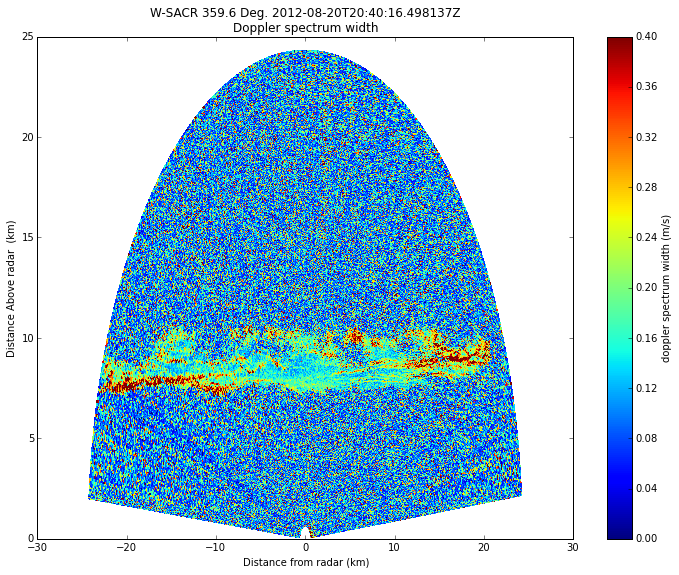

In [14]:
display.plot('spectral_width', sweep=1, 
             vmin=0, vmax=0.4)

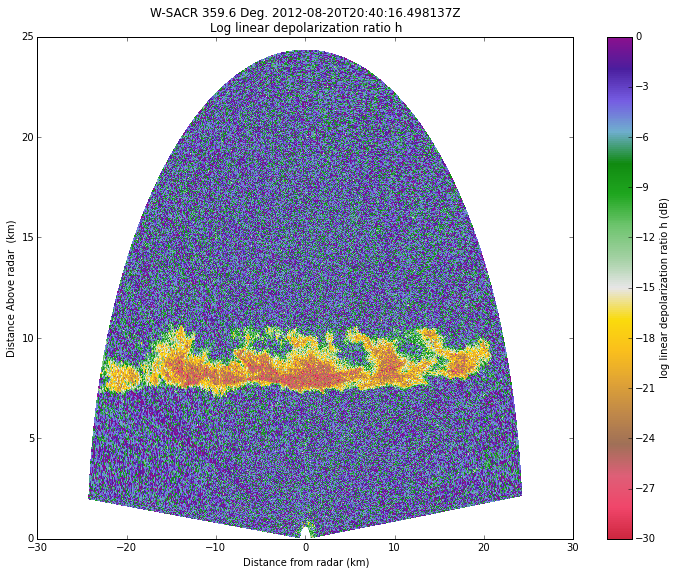

In [15]:
display.plot('linear_depolarization_ratio', 
             sweep=1, vmin=-30, vmax=0, cmap='pyart_Carbone17_r')

---
Before we take a coffee break, here is an example to give you a taste of how easy Py-ART and Python can be combined to create powerful visualization.

The next cell downloads the latest NEXRAD reflectivity scan from the National Weather Service.  Then Py-ART is used to read this file and create a plot on a Cartesian map.

Set the _nexrad_site_ variable to the ICOA code for your favorite NEXRAD site.  A full list can be found found [here](https://www.roc.noaa.gov/wsr88d/Program/NetworkSites.aspx).  Some of the presenters favorites are:

* ktlx : Norman, OK
* klot : Chicago, IL
* kokx : New York City, NY
* khtx : Huntsville, AL
* kpdt : Pendleton, OR
* kcys : Cheyenne, WY

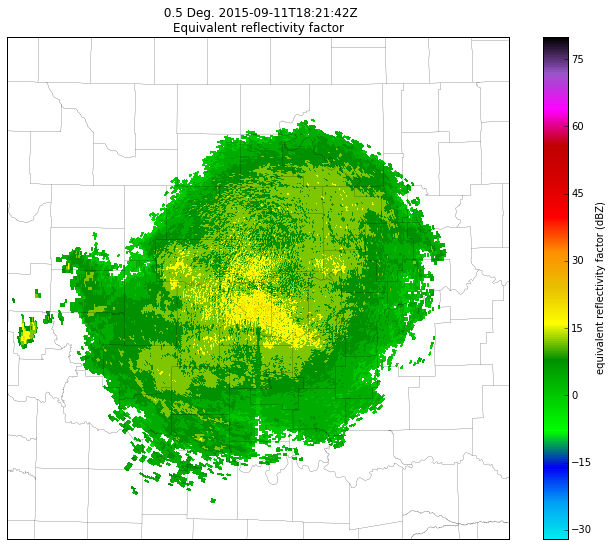

In [16]:
# The NEXRAD site from which data will be 
nexrad_site = 'ktlx'

import urllib
url = ('ftp://tgftp.nws.noaa.gov/SL.us008001/DF.of/'
       'DC.radar/DS.p19r0/SI.' + nexrad_site.lower() + '/sn.last')
handle = urllib.urlopen(url)
radar = pyart.io.read_nexrad_level3(handle)
display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map(
    'reflectivity', vmin=-32, vmax=80, cmap='pyart_NWSRef',
    resolution='c', embelish=False)
display.basemap.drawcounties()